# Feature Engineering

Extracting features from images is done by interpreting frequencies and coefficients. 
These coefficients are horizontal, vertical and diagonal frequencies.

In [8]:
# Import the necessary packages
%matplotlib inline
import numpy as np
import pywt
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
# Read the coloured image and convert to a grayscale image.
image = cv2.imread(r"C:\Users\ifunanyaScript\Everything\FootballStars_image_cnn\data\clean_dataset\cristiano_ronaldo\cristiano_ronaldo11.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

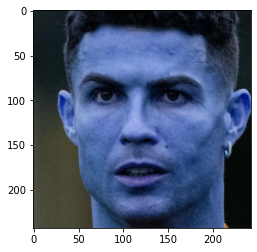

In [3]:
plt.imshow(image)

In [4]:
# Perform a 3 level Discrete Wavelet Transform
level=3
coeffs = pywt.wavedec2(gray_image, "db3", mode="periodization", level=level)

In [5]:
imageR = pywt.waverec2(coeffs, "db3", mode="periodization")
imageR = np.uint8(imageR)

In [6]:
cA = coeffs[0]
(cH1, cV1, cD1) = coeffs[-1]
(cH2, cV2, cD2) = coeffs[-2]
(cH3, cV3, cD3) = coeffs[-3]

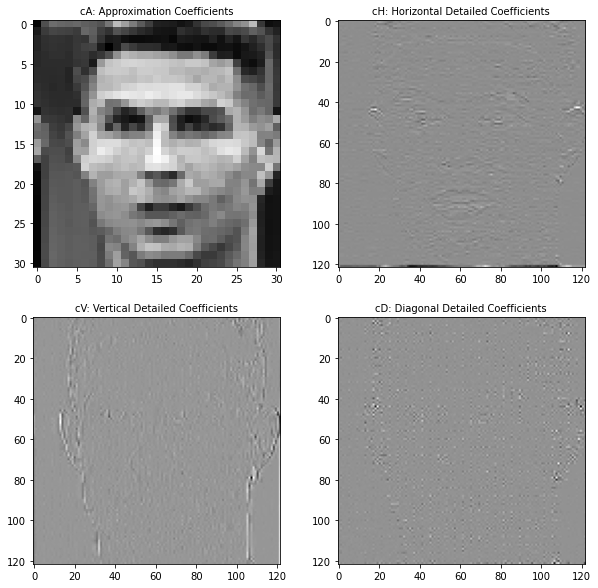

Text(0.5, 1.0, 'Reconstructed Image')

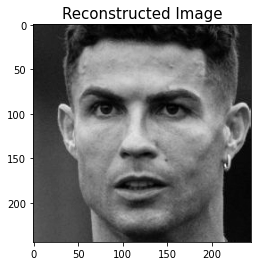

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title("cA: Approximation Coefficients", fontsize=10)

plt.subplot(2, 2, 2)
plt.imshow(cH1, cmap=plt.cm.gray)
plt.title("cH: Horizontal Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 3)
plt.imshow(cV1, cmap=plt.cm.gray)
plt.title("cV: Vertical Detailed Coefficients", fontsize=10)

plt.subplot(2, 2, 4)
plt.imshow(cD1, cmap=plt.cm.gray)
plt.title("cD: Diagonal Detailed Coefficients", fontsize=10)

plt.show()

plt.imshow(imageR, cmap="gray")
plt.title("Reconstructed Image", fontsize=15)